In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy
import pandas
import pickle

In [2]:
import colors

In [3]:
import seaborn
seaborn.set_style('white')
seaborn.set_context("paper", font_scale=2)

In [4]:
#explorations = pandas.read_csv('/home/mteruel/edm/results/dkt_lstm/by_problem_id/classifier_explorations.tsv', sep='\t')
explorations = pandas.read_csv('~/edm/results/dkt_classifier_explorations.tsv', sep='\t')
explorations = explorations.replace({'norm-fixed': 'norm'})
explorations[:3]

,Experiment,Classifier,Distance,MaxSteps,LSTMUnits,Dropout,BatchSize,EmbeddingSize,Pretrained,Finetuned,AUC,RMSE,Accuracy,R2,OverfittingScore
0,19-05-19-22-39,LSTM,None,300,50,0.3,30,None,No,NaN,0.693,0.457,0.682,0.077,NaN
1,19-05-20-02-25,LSTM,None,30,30,0.3,50,None,No,NaN,0.715,0.449,0.696,0.092,NaN
2,19-05-20-04-14,LSTM,None,50,30,0.1,50,None,No,NaN,0.719,0.448,0.698,0.103,NaN


In [6]:
explorations['ModelType'] = explorations[['Classifier', 'Distance']].apply(
    lambda x: x[0] + ('-' + x[1].split('-')[-1] if x[1] != 'None' else ''), axis=1)

In [30]:
explorations.Distance.unique()

array(['None', 'co-abs', 'co-square', 'norm', 'co-tanh', 'co-sigm'],
      dtype=object)

/home/milagro/anaconda3/envs/drl/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/milagro/anaconda3/envs/drl/lib/python3.5/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(0.6, 0.8)

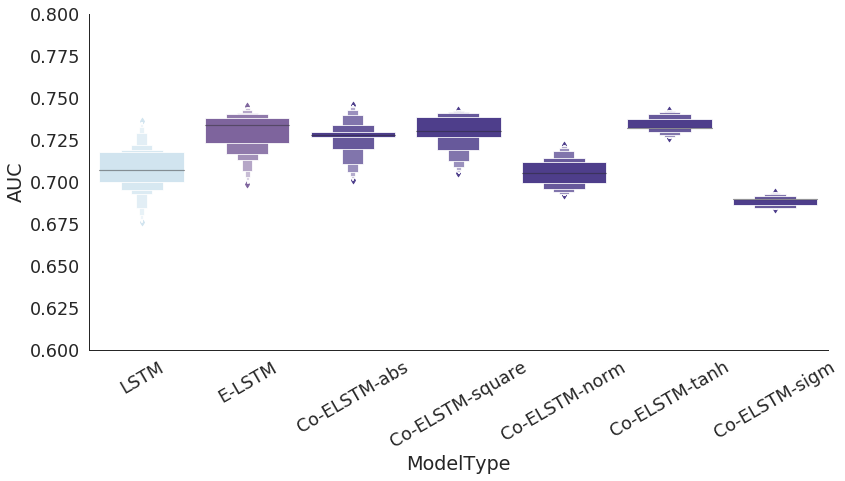

In [25]:
my_pal = {mtype: colors.dark_blue for mtype in explorations.ModelType.unique()}
my_pal['LSTM'] = colors.light_blue
my_pal['E-LSTM'] = colors.purple
g = seaborn.factorplot(
    data=explorations[explorations.Pretrained == 'No'], x='ModelType', y='AUC', kind='boxen', # hue='Pretrained',
    palette=my_pal,
    size=6, aspect=2)
g.set_xticklabels(rotation=30)
plt.ylim((0.6, 0.8))

/home/milagro/anaconda3/envs/drl/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/milagro/anaconda3/envs/drl/lib/python3.5/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(0.6, 0.8)

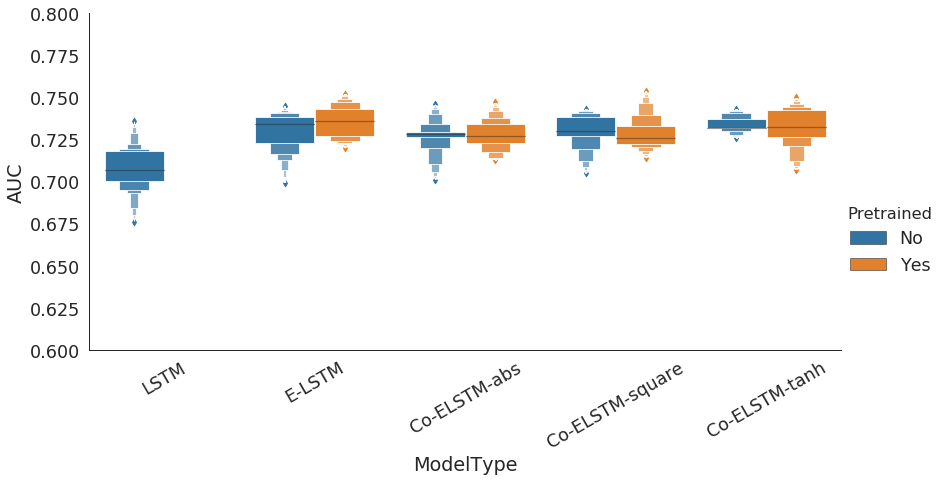

In [8]:
my_pal = {mtype: colors.dark_blue for mtype in explorations.ModelType.unique()}
my_pal['LSTM'] = colors.light_blue
my_pal['E-LSTM'] = colors.purple
g = seaborn.factorplot(
    data=explorations[explorations.Distance.isin(['co-abs', 'co-square', 'co-tanh', 'None'])],
    x='ModelType', y='AUC', kind='boxen', hue='Pretrained',
    #palette=my_pal,
    size=6, aspect=2)
g.set_xticklabels(rotation=30)
plt.ylim((0.6, 0.8))

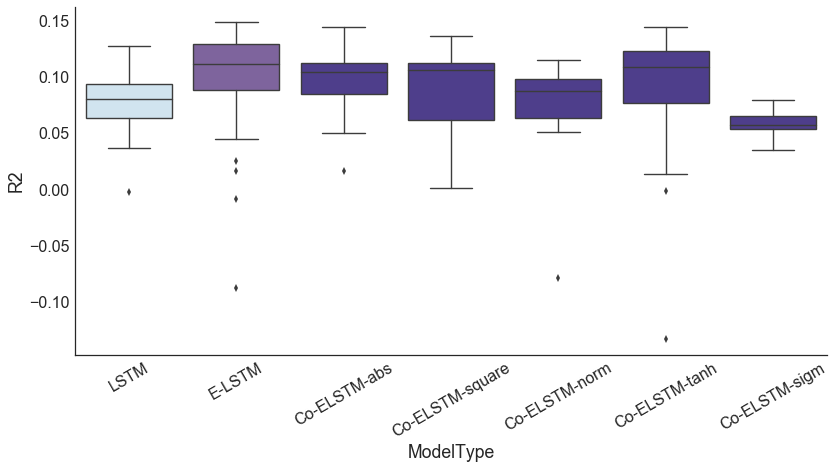

In [60]:
my_pal = {mtype: colors.dark_blue for mtype in explorations.ModelType.unique()}
my_pal['LSTM'] = colors.light_blue
my_pal['E-LSTM'] = colors.purple
g = seaborn.factorplot(
    data=explorations, x='ModelType', y='R2', kind='box', # hue='Pretrained',
    palette=my_pal,
    size=6, aspect=2)
g.set_xticklabels(rotation=30)

/home/milagro/anaconda3/envs/drl/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


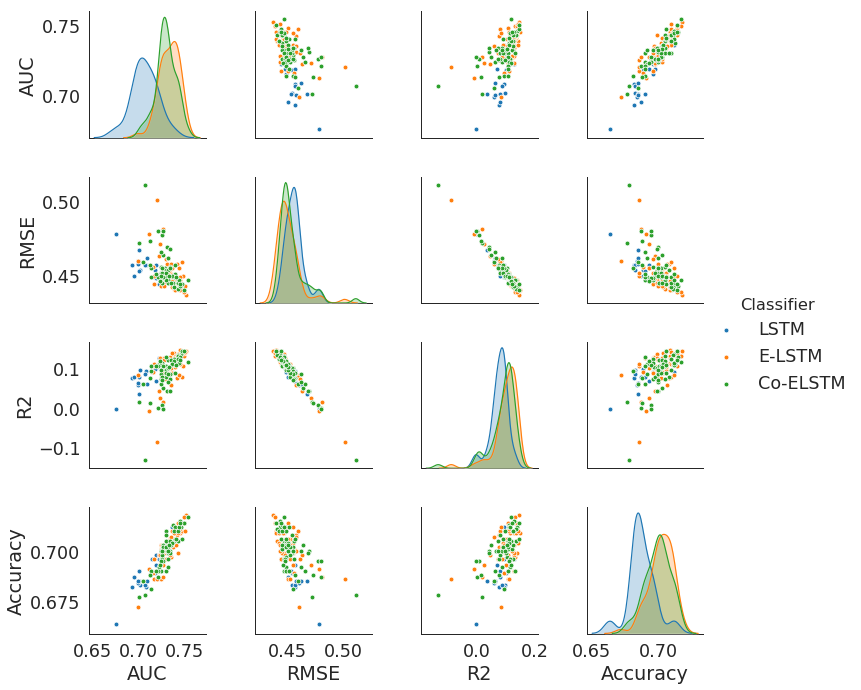

In [21]:
seaborn.pairplot(data=good_explorations, hue='Classifier',
                 vars=['AUC', 'RMSE', 'R2', 'Accuracy'])

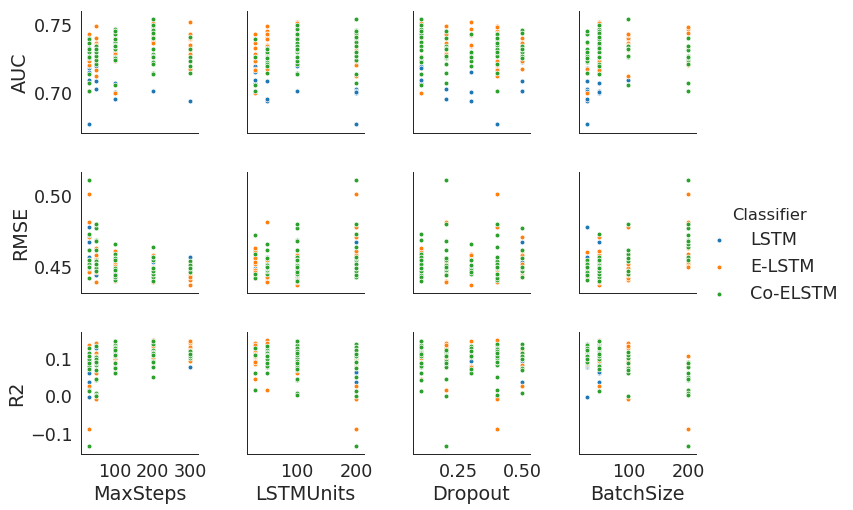

In [20]:
seaborn.pairplot(data=good_explorations, x_vars=['MaxSteps', 'LSTMUnits', 'Dropout', 'BatchSize'],
                 y_vars=['AUC', 'RMSE', 'R2'], hue='Classifier')

In [48]:
good_explorations = explorations[
    explorations.Distance.isin(['co-abs', 'co-square', 'co-tanh', 'None']) & (explorations.Pretrained == 'No')]

In [56]:
def plot_correlation(rows, cols, metric='AUC'):
    matrix = pandas.crosstab(index=good_explorations[rows],
                             columns=good_explorations[cols],
                             values=good_explorations[metric], aggfunc=numpy.average)
    seaborn.heatmap(data=matrix, annot=True)
    plt.title('Average {} performance'.format(metric))

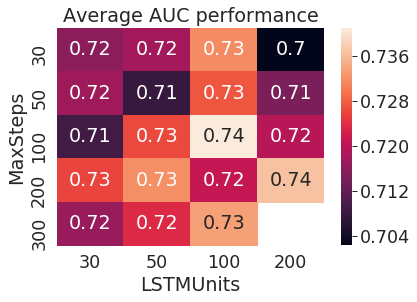

In [57]:
plot_correlation('MaxSteps', 'LSTMUnits')

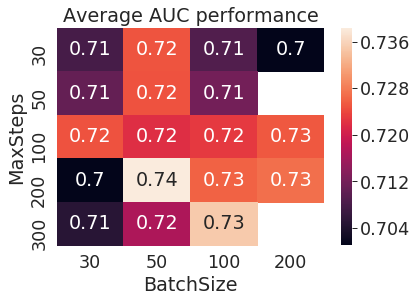

In [51]:
plot_correlation('MaxSteps', 'BatchSize')

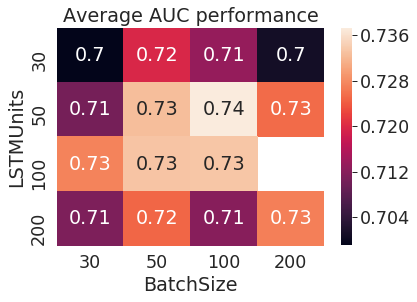

In [67]:
plot_correlation('LSTMUnits', 'BatchSize')

/home/milagro/anaconda3/envs/drl/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/milagro/anaconda3/envs/drl/lib/python3.5/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(0.6, 0.8)

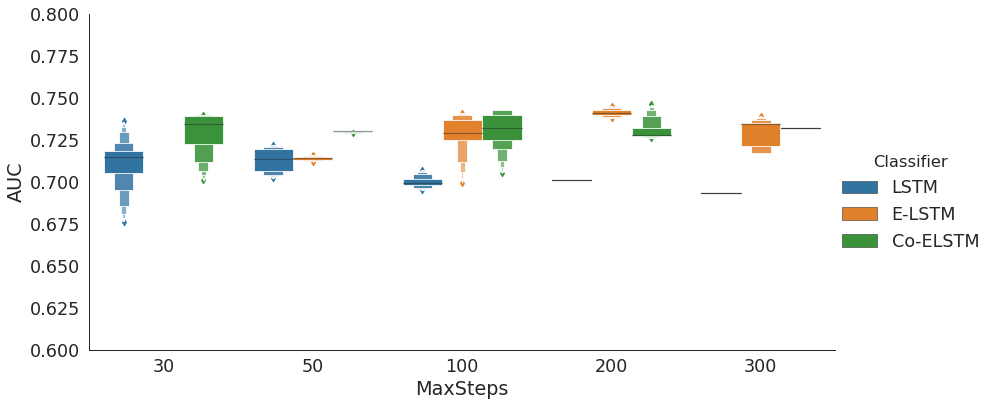

In [58]:
seaborn.factorplot(data=good_explorations, x='MaxSteps', y='AUC', kind='boxen', hue='Classifier', aspect=2, size=6)
plt.ylim((0.6, 0.8))

/home/milagro/anaconda3/envs/drl/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/milagro/anaconda3/envs/drl/lib/python3.5/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/milagro/anaconda3/envs/drl/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0.6, 0.8)

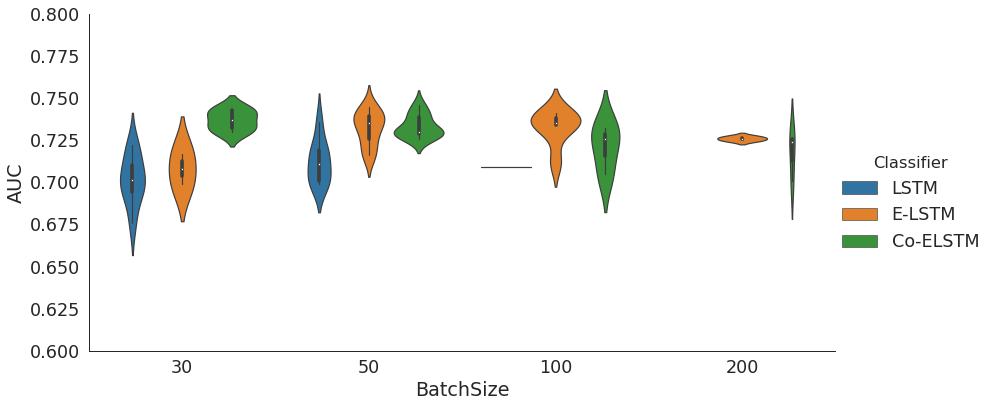

In [64]:
seaborn.factorplot(data=good_explorations, x='BatchSize', y='AUC', kind='violin', hue='Classifier', aspect=2, size=6)
plt.ylim((0.6, 0.8))

/home/milagro/anaconda3/envs/drl/lib/python3.5/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/milagro/anaconda3/envs/drl/lib/python3.5/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(0.6, 0.8)

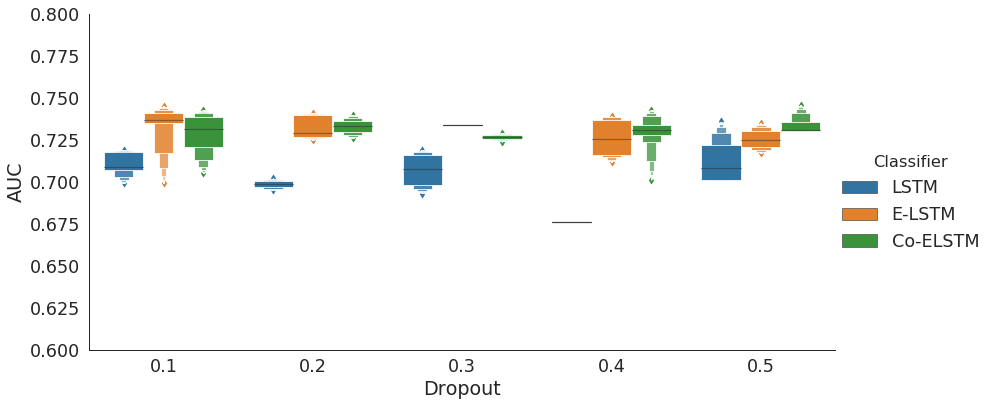

In [66]:
seaborn.factorplot(data=good_explorations, x='Dropout', y='AUC', kind='boxen', hue='Classifier', aspect=2, size=6)
plt.ylim((0.6, 0.8))

In [ ]:
seaborn.pairplot(data=good_explorations)